# Büyük Sayılar Yasası (The Law of Large Numbers (LLN))

🧑🏻‍🏫 LLN nedir? [Wikipedia'ya göre](https://en.wikipedia.org/wiki/Law_of_large_numbers)

> Bu teorem, olasılık teorisindeki temel sonuçlardan biridir. **Aynı deneyin çok sayıda kez yapılmasının sonuçlarını** açıklar. 

>Bu yasaya göre, çok sayıda denemeden elde edilen sonuçların ortalaması, beklenen değere yani teorik ortalama değere yakın olmalıdır ve deneme sayısı arttıkça ortalama değer beklenen değere daha da yaklaşacaktır.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 🎲 Zar atma

🎲 Zar atmak, 1, 2, 3, 4, 5, 6 olmak üzere 6 olası sonucu olan rastgele bir deneydir.

🤔 Peki bir Jupyter Notebook içinde nasıl zar atarım?

👉 [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) `low`  (dahil) ve `high` (hariç) arasında rastgele bir tam sayı döndürür.

In [2]:
# Bu hücreyi birçok kez çalıştır
np.random.randint(1, 6+1)

4

* Bu hücreyi her çalıştırdığında, bir zar atıyorsun ve bu deneyin sonucu tamamen rastgele (1, 2, 3, 4, 5 veya 6). Buna basitçe bir **`random experiment`** (rastgele deney) diyoruz. 
* ❓Aynı anda 3 tane zar nasıl atılır?   [numpy.random.randint](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) dokümanını oku ve bu üç zarı at. ❓

In [7]:
np.random.randint(1,7,size=3)

array([4, 3, 2])

🚀Şimdi, zarımızı`n = 20` kez atalım ve sonuçların ortalamasını hesaplayalım.
Sonuçları `outcomes` adlı bir değişkende, bu sonuçların ortalamasını ise `average_outcome` adlı bir değişkende sakla. 

In [9]:
outcomes=np.random.randint(1,7,size=20)
average_outcomes=outcomes.mean()
print(average_outcomes)

2.95


🤔 Beklediğin ortalama değer neydi?
Bu değeri `expected_value` adlı bir değişkene kaydet. 

In [10]:
expected_value=3.5

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('expected_value_dice',
    expected_value=expected_value
)
result.write()
print(result.check())


============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\lenova\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\lenova\data-law-of-large-number\tests
plugins: anyio-3.5.0
collecting ... collected 1 item

test_expected_value_dice.py::TestExpectedValueDice::test_expected_value_dice PASSED [100%]

============================== 1 passed in 0.09s ==============================


💯 You can commit your code:

git add tests/expected_value_dice.pickle

git commit -m 'Completed expected_value_dice step'

git push origin master



<details>
    <summary>Explanations <i>(Bu bölümü açmadan önce beklenen ortalama değeri biraz düşün!)</i></summary>

"Zar atma" adlı rastgele deneyin olası sonuçlarını ve ilgili olasılıklarını aşağıdaki tabloda gösterebiliriz.


| Possible outcomes | 1   | 2   | 3   | 4   | 5   | 6   | Total |
|-------------------|-----|-----|-----|-----|-----|-----|-------|
| Probabilities     | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 100%  |
    
 `expected/theoretical average value` Beklenen/teorik ortalama değer şu şekilde hesaplanabilir:
    

$$ \mathbb{E}[X] = 1 \times \frac{1}{6} + 2 \times \frac{1}{6} + 3 \times \frac{1}{6} + 4 \times \frac{1}{6} + 5 \times \frac{1}{6} + 6 \times \frac{1}{6} = 3.5 $$
 
Burada `X` , zar atma deneyinin rastgele sonucunu ifade eder.

👉 Bu nedenle `X`  'e bir `random variable` (rastgele değişken) deriz. 

</details>

--- 

🔥 Şimdi 🎲 zar atma deneyi için Büyük Sayılar Yasası’nı doğrulayalım.

***Questions :***

👉 Deneme sayısıyla oynayarak her bir durumda elde edilen ortalama sonucu hesapla.

🎨 Ortalama sonucu deneme sayısına karşı plot et.

**Steps to code (pseudo-code)**:

1. Denemek istediğin deneme sayılarını belirle (1, 2, 3, 4, … seçtiğin maksimum sayıya kadar). Bu aralığı `trials` adlı bir değişkende sakla.
2. Sonuçları saklamak için boş bir liste `results` oluştur.
3.`trials` içindeki her değer için:
-Zarı o sayı kadar at ve sonuçları sakla
-Sonuçların ortalamasını hesapla
-Hesaplanan ortalamayı `results` listesine kaydet
4.`results` değerlerini `trials`değerlerine karşı plot et (aşağıda bu plot kodu verildi)

In [12]:
trials=range(1,16)
results=[]
for n in trials:
    outcomes = np.random.randint(1, 7, size=n)
    average_outcome = outcomes.mean()
    results.append(average_outcome)

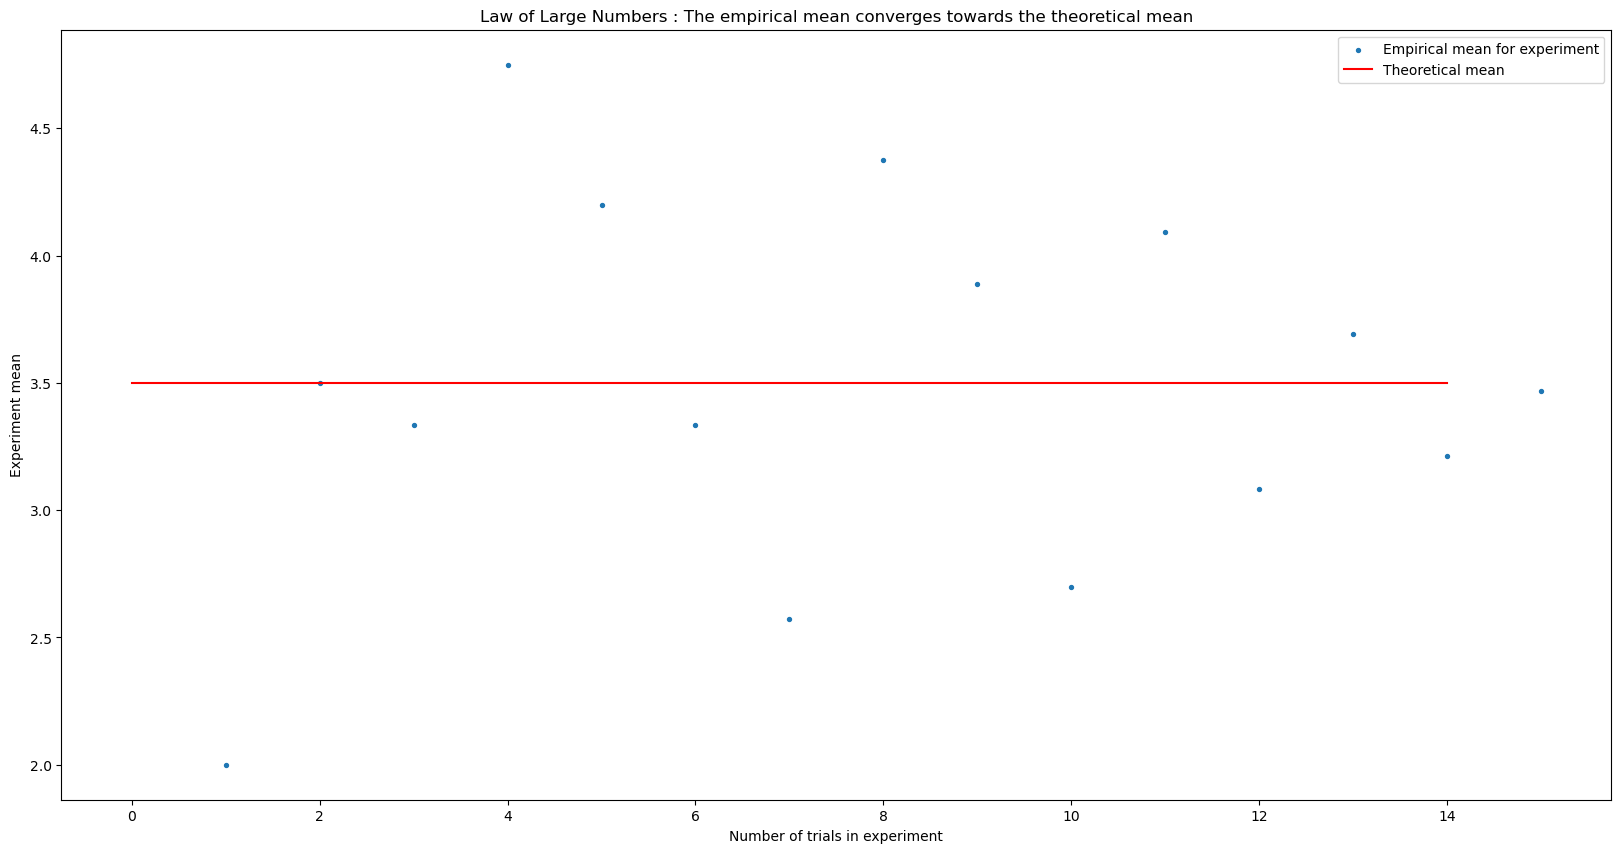

In [13]:
#############################################
#         sonuçları plot et          #
#############################################
    
    
plt.figure(figsize=(20,10))

plt.scatter(
    x=trials,
    y=results,
    label='Empirical mean for experiment',
    s=8
)
plt.plot(
    [expected_value]*len(results),
    label='Theoretical mean',
    color="red"
)

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials in experiment')
plt.ylabel('Experiment mean')

plt.legend(loc='best')
plt.show()

🎉 Görsel olarak fark edebiliyoruz ki `empirical mean (ortalama)`  $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$   deneme sayısı n  arttıkça `beklenen değere ` $ \mu = 3.5 $  yaklaşıyor!

## 🪙 Yazı-Tura atma (coin toss)

### One time

👉 Şimdi aynı deneyi bu kez yazı–tura atarak yapalım.

Artık sonuçlar 0 ve 1.

Deneyi 100 kez çalıştırırsan, büyük olasılıkla yaklaşık 50 tura – 50 yazı elde edersin.
* “Tura”yı başarılı bir deney olarak tanımlayalım ve $p$’yi tura gelme olasılığı olarak düşünelim. Sezgisel olarak:  $ p = \frac{1}{2} = 0.5 = 50 \%$

🤓 İki olası sonucu olan (başarı / başarısızlık)  `success/failure` $p$ as olan bir rastgele deneyin, parametresi p olan bir **`Bernoulli distribution`** izlediği söylenir; burada  `p` $ \in [0,1] $

🔥 Şimdi bu yazı–tura deneyi için Büyük Sayılar Yasasını `Law of Large Numbers` doğrulayalım. 

***Questions :***

👉 `Aşağıdaki hücrede deneme sayısıyla oynayın` ve deneme sayısına karşı ortalama sonucu gösteren grafiği inceleyin.

In [14]:
number_of_trials = 500 # bu numaralarla oynayın
p = 0.5 # beklenen değer

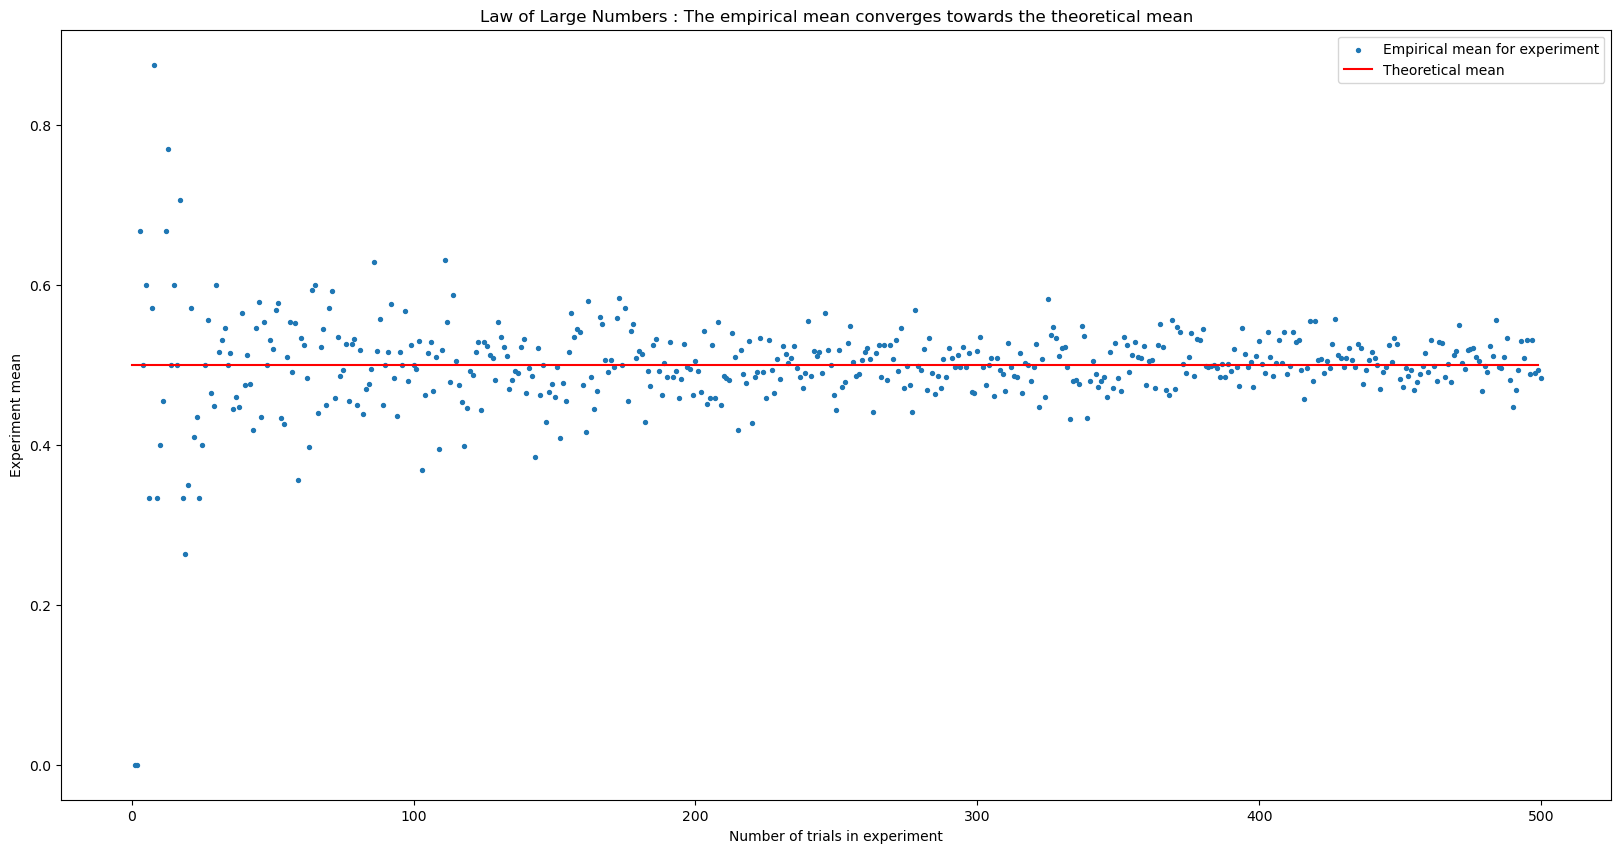

In [15]:
#############################################
#    deneme sayısıyla oynamak               #
#############################################
trials = np.arange(1,number_of_trials + 1,1)
results = [np.mean(np.random.randint(0, 1+1, n)) for n in trials]
    
#############################################
#         sonuçları plot et         #
#############################################
        
plt.figure(figsize=(20,10))

plt.scatter(
    x=trials,
    y=results, 
    label='Empirical mean for experiment',
    s=8
)
plt.plot(
    [p]*len(results),
    label='Theoretical mean', 
    color="red"
)

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials in experiment')
plt.ylabel('Experiment mean')

plt.legend(loc='best')
plt.show()

🎉 Görsel olarak fark edebiliyoruz ki `empirical mean (ortalama)`  $ \bar{X_n} = \frac{X_1 + X_2 + ... + X_{n-1} + X_n}{n}$ `deneme sayısı n arttıkça beklenen değere ` $ \mu = 0.5 $  *yaklaşıyor* !

### Multiple times

👉Burada,  ***TEK bir deney***  şunlardan oluşur:
* Yazı–tura atmayı `n_times` n kez yapmak
* Her denemenin p olasılıkla `probability p` başarılı olması

👉 Bir deneyi çalıştırdıktan sonra, başarı sayısını hiç başarı olmaması ile n_times kadar başarı `n_times successes` arasında sayabiliriz.

📚 Şu özelliklere sahip bir rastgele deney:
- iki olası sonuç: `success/failure`
- `p` $ \in [0,1] $ başarı olasılığı `probability of success`
- `n` $ \in \mathbb{N} $ deneme sayısı

 **`Binomial distribution (n,p)`**  dağılımını izler.

😉 Düşünürsen, **`Binomial dağılımı (n,p), n adet bağımsız Bernoulli(p) rastgele değişkeninin toplamıdır!`** !

---

❓ Aşağıdaki hücrede, Python’da TEK bir Binomial deneyi simüle etmek için  [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) fonksiyonunu kullan: 

- $p = 0.7$ (yani yazı–tura biased olsun)
- $n = 10$ deneme



In [20]:
# Bu hücreyi bir Binom Deneyi'nin 
# tek bir gerçekleşmesi için birden fazla kez çalıştır

n = 10  # yazı–tura n kez atmak
p = 0.7 # başarı olasılığı p ile tanımlanmış

success_count = np.random.binomial(n, p)

print(f"10 atış yapıldı. Toplam başarı (yazı) sayısı: {success_count}")

10 atış yapıldı. Toplam başarı (yazı) sayısı: 5


❓ Şimdi bu deneyi $N = 20$ kez tekrar et ve bu 20 sonucun her birini bir liste içinde sakla.

<details>
    <summary><i>Hint</i></summary>
    
Bu hücreyi birkaç kez çalıştır ve rastgeleliği gözlemle…!
    
</details>

In [21]:
# Bu hücreyi bir Binom Deneyi'nin 
# N adet gerçekleşmesi için birden fazla kez çalıştır

N = 20  # deney sayısı
n = 10  # yazı–tura n kez atmak
p = 0.7 # başarı olasılığı p ile tanımlanmış

outcomes = np.random.binomial(n, p, size=N)

print(f"20 deneyin her birindeki başarı sayıları:\n{outcomes}")


20 deneyin her birindeki başarı sayıları:
[7 8 7 8 6 7 4 8 5 8 6 8 5 6 5 7 8 7 7 8]


🔥 Şimdi, bu birden fazla yazı–tura atma deneyi için `Law of Large Numbers` doğrulayalım. 

*** Sorular:***

🤔 Beklediğin ortalama değer neydi? Bunu `expected_value_coins` adlı bir değişkende sakla.

In [22]:
expected_value_coins = 7

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('expected_value_coins',
    expected_value_coins=expected_value_coins
)
result.write()
print(result.check())


============================= test session starts =============================
platform win32 -- Python 3.11.5, pytest-7.4.0, pluggy-1.0.0 -- C:\Users\lenova\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\lenova\data-law-of-large-number\tests
plugins: anyio-3.5.0
collecting ... collected 1 item

test_expected_value_coins.py::TestExpectedValueCoins::test_expected_value_coins PASSED [100%]

============================== 1 passed in 0.24s ==============================


💯 You can commit your code:

git add tests/expected_value_coins.pickle

git commit -m 'Completed expected_value_coins step'

git push origin master



<details>
    <summary>Açıklamalar</summary>

💡 $n = 10$ yazı–tura atışı ve $p = 0.7$ için, bir Binom deneyinde beklenen başarı sayısı: $ n \times p = 10 \times 0.7 = 7$ 
    
📚 Bu sonuç, herhangi bir `Binomial(n,p)` rastgele deneyi için geçerlidir! 
    
$$ \mathbb{E}[X] = np $$
    
</details>

📈 Bu sonuçları aşağıda görselleştir.

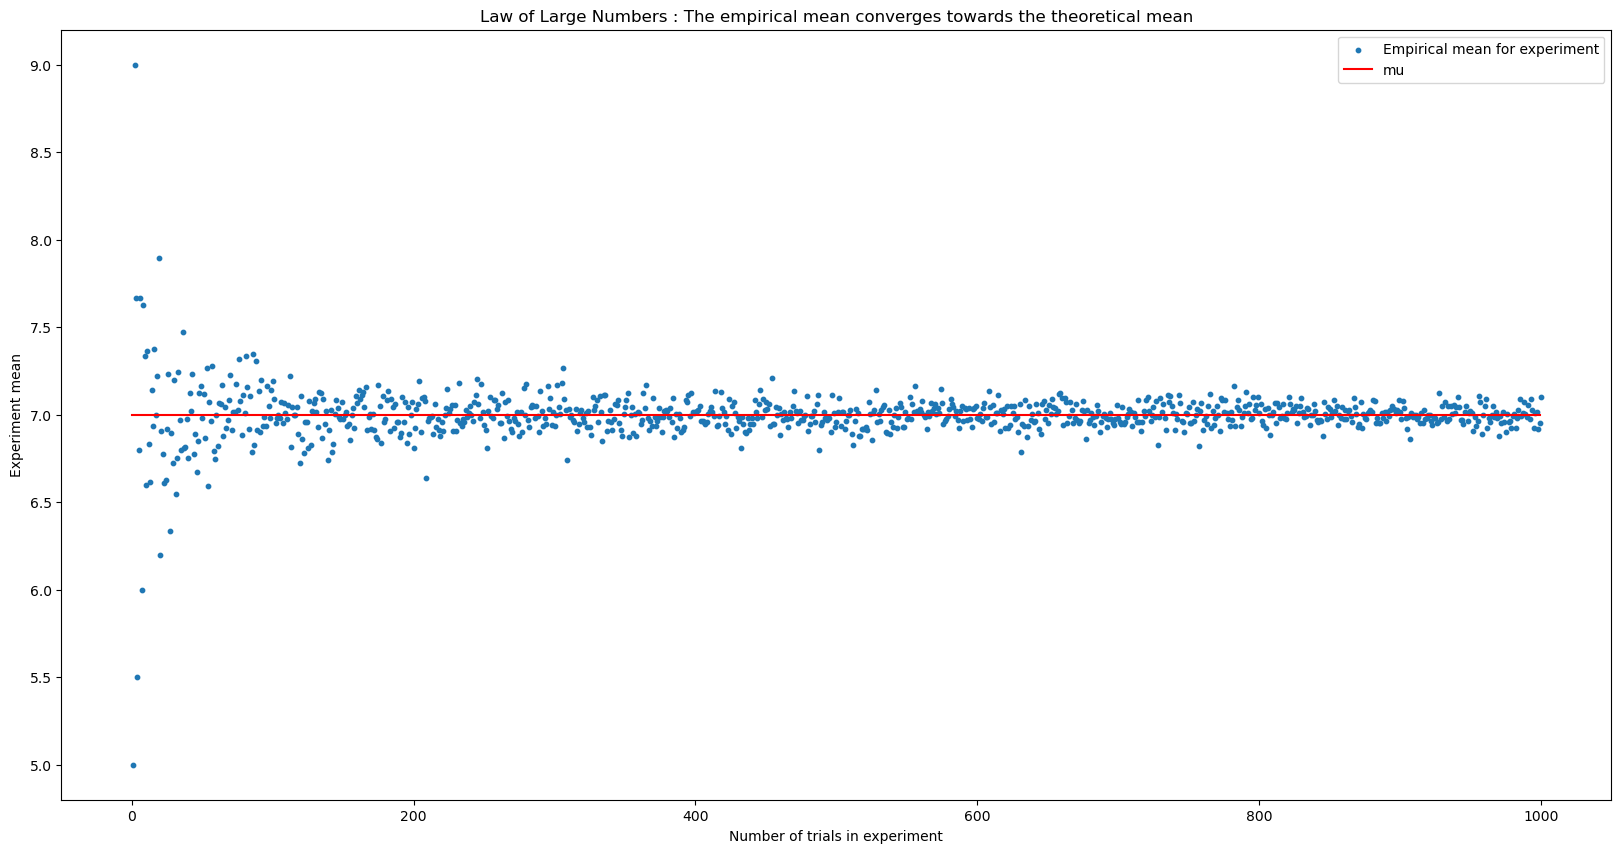

In [24]:
#############################################
#    deneme sayısıyla oynama                #
#############################################
p = 0.7
n = 10
N = 1000

trials = np.arange(1, N+1, 1)
results = [np.mean(np.random.binomial(n=n,p=p, size=N)) for N in trials]
    
#############################################
#           sonuçları plot et               #
#############################################
    
    
plt.figure(figsize=(20,10))

plt.scatter(
    x=trials,
    y=results,
    label='Empirical mean for experiment',
    s=10
)
plt.plot([expected_value_coins]*len(results),label='mu', color = "red")

plt.title('Law of Large Numbers : The empirical mean converges towards the theoretical mean')
plt.xlabel('Number of trials in experiment')
plt.ylabel('Experiment mean')

plt.legend(loc='best')
plt.show()

🏁  Tebrikler!!!

🔥 Olasılık Teorisinin en temel teoremlerinden biri olan Büyük Sayılar Yasası’nı başarıyla öğrendin.

💾 Challenge’ını `add/commit/push` yapmayı unutma!

---

***Ek kaynaklar***

📺 [Law of Large Numbers - Explained and Visualized](https://www.youtube.com/watch?v=MntX3zWNWec)  Jeremy Blitz-Jones (4 dk 11 saniye)

